<a href="https://colab.research.google.com/github/vandana2588/Play-Store-App-and-User-Review-Analysis/blob/main/Play_Store_App_and_User_Review_Analysis_by_Vandana_Pattnaik_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sna
import matplotlib.pyplot as plt

In [ ]:
#Warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
playstore_data = pd.read_csv('/content/Play Store Data.csv')


In [ ]:
user_review = pd.read_csv('/content/User Reviews.csv')

In [ ]:
user_review.shape

(64295, 5)

In [ ]:
type(playstore_data)

pandas.core.frame.DataFrame

# **USER REVIEW DATA ANALYSIS**

In [ ]:
type(user_review)

pandas.core.frame.DataFrame

In [ ]:
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_review.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sentiment_Polarity,37432.0,0.182146,0.351301,-1.0,0.000000,0.150000,0.40,1.0
Sentiment_Subjectivity,37432.0,0.492704,0.259949,0.0,0.357143,0.514286,0.65,1.0


In [ ]:
count = user_review.isnull().sum().sort_values(ascending=False)
percentage = ((user_review.isnull().sum()/len(user_review)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys = ['count', 'percentage'])
print('count and percentage of missing values for the columns')
missing_data

count and percentage of missing values for the columns


,count,percentage
Translated_Review,26868,41.788631
Sentiment,26863,41.780854
Sentiment_Polarity,26863,41.780854
Sentiment_Subjectivity,26863,41.780854
App,0,0.000000


Percentage for default

Positive    64.11
Negative    22.10
Neutral     13.79
Name: Sentiment, dtype: float64


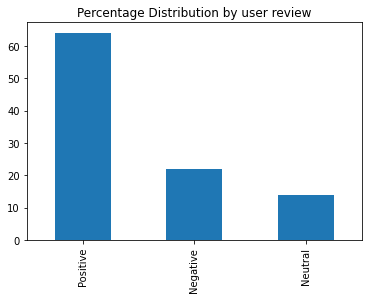

In [ ]:
##Checking for the distribution of default
import matplotlib.pyplot as plt
print('Percentage for default\n')
print(round(user_review.Sentiment.value_counts(normalize=True)*100,2))
round(user_review.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distribution by user review')
plt.show()

In [ ]:
user_review.shape

(64295, 5)

In [ ]:
user_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


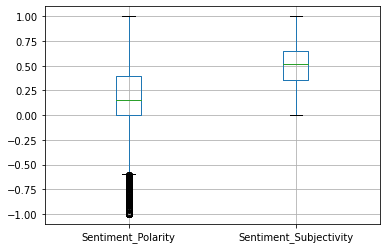

In [ ]:
user_review.boxplot();

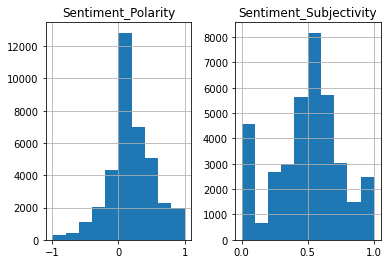

In [ ]:
user_review.hist();

In [ ]:
user_review.isnull()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,True,True,True
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64290,False,True,True,True,True
64291,False,True,True,True,True
64292,False,True,True,True,True
64293,False,True,True,True,True


In [ ]:
user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
threshold = len(user_review) * 0.1
print(threshold)

6429.5


## **PLAYSTORE DATA ANALYSIS**

In [ ]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstore_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
playstore_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
playstore_data.tail(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
playstore_data.shape

(10841, 13)

In [ ]:
playstore_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


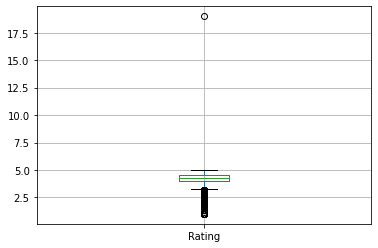

In [ ]:
playstore_data.boxplot()

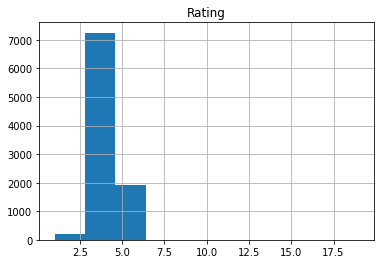

In [ ]:
playstore_data.hist();

#**DATA CLEANING**


In [ ]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
playstore_data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#**CHECKING FOR OUTLIERS**

In [ ]:
playstore_data[playstore_data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#**REMOVING OF OUTLIERS**

In [ ]:
playstore_data.drop([10472], inplace=True)

In [ ]:
playstore_data[10469:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


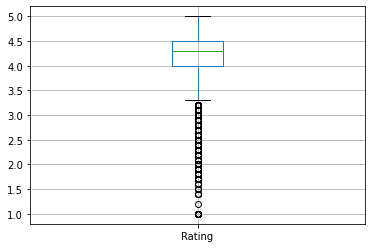

In [ ]:
playstore_data.boxplot();

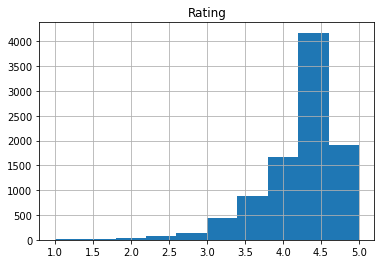

In [ ]:
playstore_data.hist();

# **REMOVAL OF COLUMNS WHICH IS EMPTY(90%)**


In [ ]:
threshold = len(playstore_data) * 0.1
print(threshold)

1084.0


In [ ]:
playstore_data.dropna(thresh = threshold, axis = 1, inplace = True)

In [ ]:
print(playstore_data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


# **DATA MANIPULATION**

In [ ]:
def impute_median(series):
  return series.fillna(series.median)

In [ ]:
playstore_data.Rating = playstore_data['Rating'].transform(impute_median)

In [ ]:
playstore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
print(playstore_data['Type'].mode())
print(playstore_data['Current Ver'].mode())
print(playstore_data['Android Ver'].mode)

0    Free
dtype: object
0    Varies with device
dtype: object
<bound method Series.mode of 0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 10840, dtype: object>


In [ ]:
playstore_data['Type'].fillna(str(playstore_data['Type'].mode().values[0]),inplace=True)
playstore_data['Current Ver'].fillna(str(playstore_data['Current Ver'].mode().values[0]),inplace=True)
playstore_data['Android Ver'].fillna(str(playstore_data['Android Ver'].mode().values[0]),inplace=True)

In [ ]:
playstore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
playstore_data['Price'] = playstore_data['Price'].apply((lambda x: str(x).replace('$', '') if '$' in str(x) else str(x)))
playstore_data['Price'] = playstore_data['Price'].apply(lambda x: float(x))
playstore_data['Reviews'] = pd.to_numeric(playstore_data['Reviews'],errors = 'coerce')


In [ ]:
playstore_data['Installs'] = playstore_data['Installs'].apply(lambda x: str(x).replace('+' , '') if '+' in str(x) else str(x))
playstore_data['Installs'] = playstore_data['Installs'].apply(lambda x: str(x).replace(',' , '') if ',' in str(x) else str(x))
playstore_data['Installs'] = playstore_data['Installs'].apply(lambda x: float(x))

In [ ]:
playstore_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstore_data.describe()

,Reviews,Installs,Price
count,1.084000e+04,1.084000e+04,10840.000000
mean,4.441529e+05,1.546434e+07,1.027368
std,2.927761e+06,8.502936e+07,15.949703
min,0.000000e+00,0.000000e+00,0.000000
25%,3.800000e+01,1.000000e+03,0.000000
50%,2.094000e+03,1.000000e+05,0.000000
75%,5.477550e+04,5.000000e+06,0.000000
max,7.815831e+07,1.000000e+09,400.000000


# **DATA VISUALIZATION**

In [ ]:
grp = playstore_data.groupby('Category')
x = grp['Installs'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

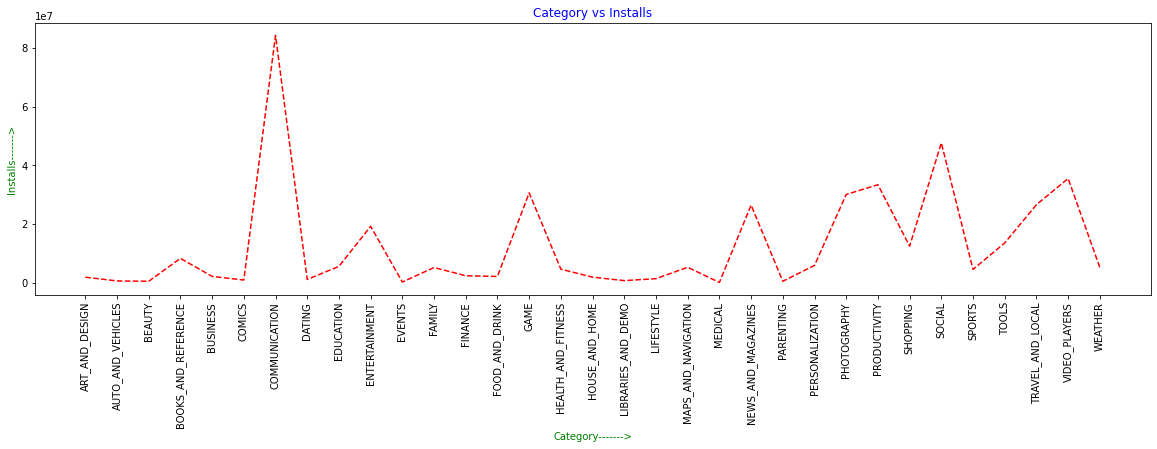

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(x , 'r--' , color='r')
plt.xticks(rotation=90)
plt.title('Category vs Installs' , color= 'b')
plt.xlabel('Category------->' , color='g')
plt.ylabel('Installs------->' , color='g')
plt.show()

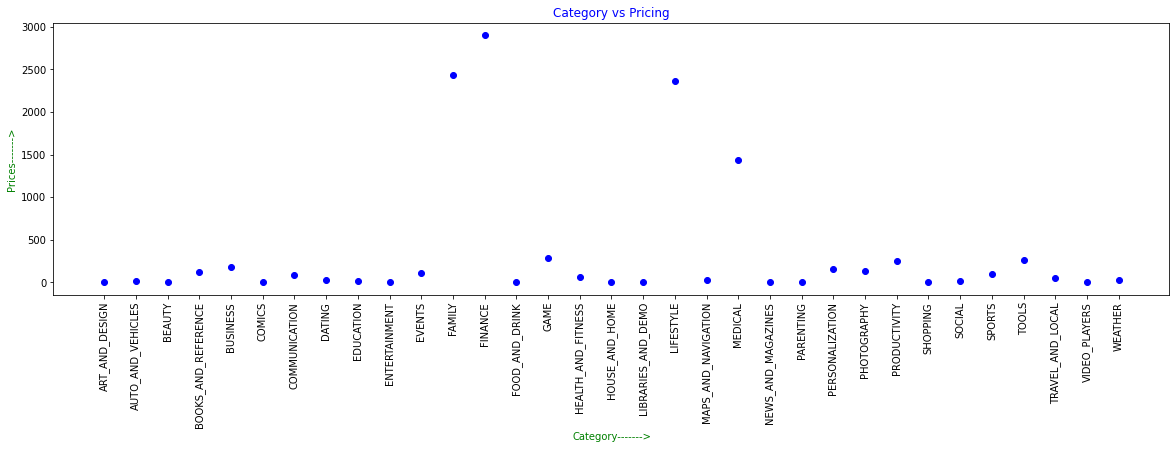

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y , 'ro' , color='b')
plt.xticks(rotation=90)
plt.title('Category vs Pricing' , color= 'b')
plt.xlabel('Category------->' , color='g')
plt.ylabel('Prices------->' , color='g')
plt.show()

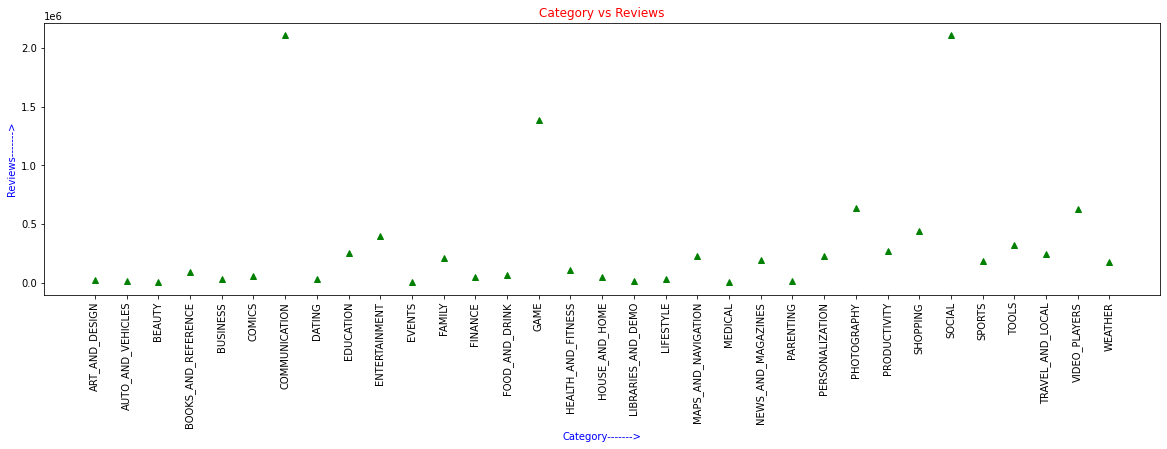

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(z , 'g^' , color='g')
plt.xticks(rotation=90)
plt.title('Category vs Reviews' , color= 'r')
plt.xlabel('Category------->' , color='b')
plt.ylabel('Reviews------->' , color='b')
plt.show()

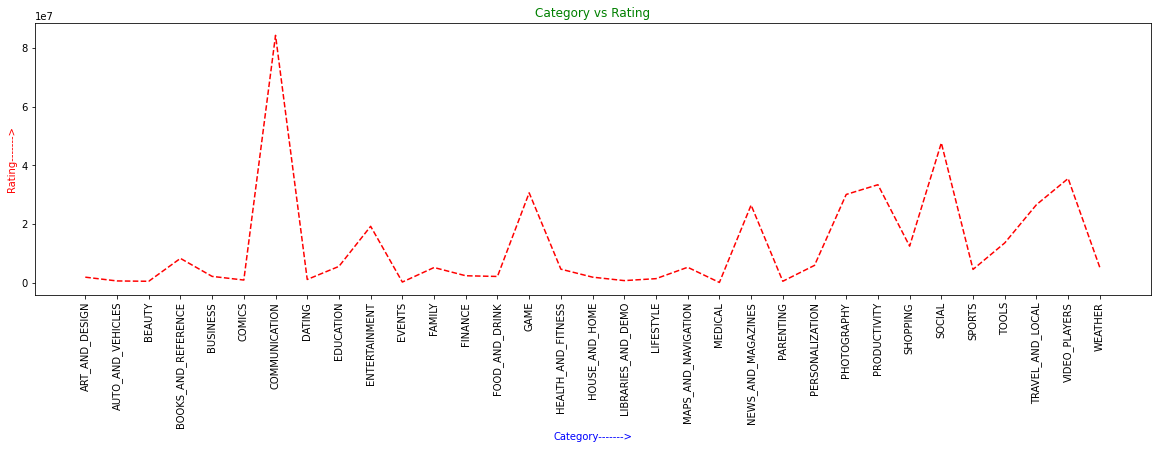

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(x , 'r--' , color='r')
plt.xticks(rotation=90)
plt.title('Category vs Rating' , color= 'g')
plt.xlabel('Category------->' , color='b')
plt.ylabel('Rating------->' , color='r')
plt.show()